### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [381]:
data = pd.read_csv('data/Module_5/data/coupons.csv')

In [382]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [383]:
# Check the dataset for missing or problematic data
data.info()
missing_vals = data.isnull().sum()
print(missing_vals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [384]:
# Drop the missing data by first removing the "car" column, followed by removing the rest of the missing data
data_1 = data.drop(columns=['car'])
data_2 = data_1.dropna()

#data_2
#data_2.info()

4. What proportion of the total observations chose to accept the coupon? 



In [385]:
# Calculate porportion by people who accept the coupon divided by total number of samples

#print(data_2['Y'].sum())
#print(len(data_2))
prop_accp = data_2['Y'].sum() / len(data_2)

print(prop_accp)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

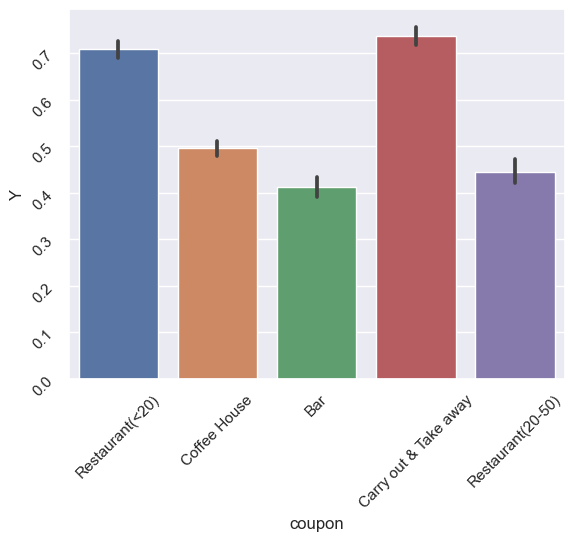

In [386]:
# Use Seaborn barplot to visualize the coupon column
bp = sns.barplot(data_2, x = "coupon", y = "Y")
bp.tick_params(labelrotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

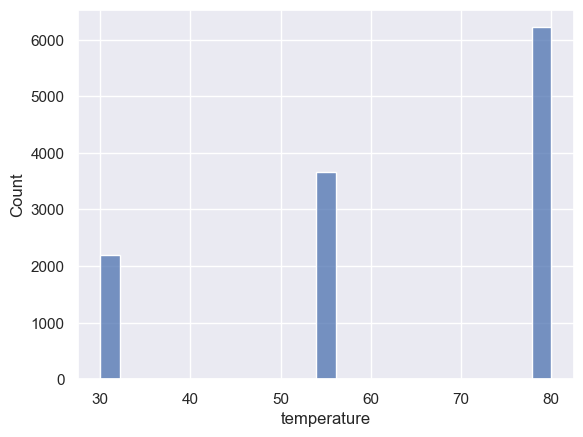

In [387]:
# Use Seaborn histogram to visualize the temperature column
sns.histplot(data_2, x = "temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [388]:
# Create a new dataframe that contains only the bar coupons
data_bar = data_2[data_2['coupon'].str.contains("Bar")]
data_bar.info

<bound method DataFrame.info of            destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
46     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
57                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
24            1d   Male  21        Single 

2. What proportion of bar coupons were accepted?


In [389]:
# Calculate the proportion of bar coupons were accepted
#print(data_bar['Y'].sum())
#print(len(data_bar))
prop_accp_bar = data_bar['Y'].sum() / len(data_bar)

print(prop_accp_bar)

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [390]:
# Create a new dataframe that contains those who went to a bar 3 or fewer times 
# and calculate the proportion of bar coupons were accepted
data_bar_3_or_less = data_bar.query("Bar == ['never', 'less1', '1~3']")
prop_3_or_less = data_bar_3_or_less['Y'].sum() / len(data_bar_3_or_less)

#data_bar_3_or_less.info()
print(prop_3_or_less)

# Create a new dataframe that contains those who went to a bar 4 or more times 
# and calculate the proportion of bar coupons were accepted
data_bar_4_or_more = data_bar.query("Bar == ['4~8', 'gt8']")
prop_4_or_more = data_bar_4_or_more['Y'].sum() / len(data_bar_4_or_more)

#data_bar_4_or_more.info()
print(prop_4_or_more)

# Compare the acceptance rate, True means people went to a bar 4 or more times have higher acceptance rate 
ans_3 = prop_3_or_less < prop_4_or_more
print(ans_3)

# Conclusion: People went to a bar 4 or more times have higher acceptance rate of coupons

0.37267441860465117
0.7616580310880829
True


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [391]:
# Create a new dataframe that contains those who go to a bar more than once a month and 
# are over the age of 25 to the all others. Calculate the proportion of bar coupons were accepted after that
bar_1_or_more = ['1~3', '4~8', 'gt8']
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

data_bar_1_or_more_age_over_25 = data_bar.query('Bar in @bar_1_or_more & age in @age_over_25')
#data_bar_1_or_more_age_over_25.info()

prop_bar_1_or_more_age_over_25 = data_bar_1_or_more_age_over_25['Y'].sum() / len(data_bar_1_or_more_age_over_25)
print(prop_bar_1_or_more_age_over_25)

# Create a new dataframe that contains those who go to a bar less than once a month or 
# less the the age of 25 of all others. Then calculate the proportion of bar coupons were accepted
bar_1_or_less = ['never', 'less1']
age_less_25 = ['below21', '21']

data_bar_1_or_less_age_less_25 = data_bar.query('Bar in @bar_1_or_less | age in @age_less_25')
#data_bar_1_or_less_age_less_25.info()

prop_bar_1_or_less_age_less_25 = data_bar_1_or_less_age_less_25['Y'].sum() / len(data_bar_1_or_less_age_less_25)
print(prop_bar_1_or_less_age_less_25)

# Compare the acceptance rate of these two groups. True means drivers who go to a bar more than once a month 
# and are over the age of 25 are more likely to accept the coupons
ans_4 = prop_bar_1_or_more_age_over_25 > prop_bar_1_or_less_age_less_25
print(ans_4)

# Conclusion: Drivers who go to a bar more than once a month and are over the age of 25 
# are more likely to accept the coupons


0.6898263027295285
0.33774834437086093
True



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [392]:
# Create a new dataframe that contains those who go to a bar more than once a month and 
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
passenger_not_kid = ['Friend(s)', 'Partner']
occupation_in_fff = ['Farming Fishing & Forestry']

data_gp_5 = data_bar.query('Bar in @bar_1_or_more & passanger in @passenger_not_kid & occupation not in @occupation_in_fff')
#data_gp_5.info()

prop_data_gp_5 = data_gp_5['Y'].sum() / len(data_gp_5)
print(prop_data_gp_5)

# Create a new dataframe that contains those other than the group described above.
data_gp_6 = data_bar.query('Bar not in @bar_1_or_more | passanger not in @passenger_not_kid | occupation in @occupation_in_fff')
#data_gp_6.info()

prop_data_gp_6 = data_gp_6['Y'].sum() / len(data_gp_6)
print(prop_data_gp_6)

# Compare the acceptance rate of these two groups. True means drivers who go to bars more than once a month 
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 
# are more likely to accept the coupons.
ans_5 = prop_data_gp_5 > prop_data_gp_6
print(ans_5)

# Conclusion: Drivers who go to bars more than once a month and had passengers that were not a kid 
# and had occupations other than farming, fishing, or forestry are more likely to accept the coupons

0.7142857142857143
0.37877030162412995
True


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [393]:
# Create a new dataframe that contains these three groups described above 
marital_window = ['Widowed']
age_under_30 = ['below21', '21', '26']
cheap_resta_4_more = ['4~8', 'gt8']
income_50K_less = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

data_gp_7 = data_bar.query('Bar in @bar_1_or_more & passanger in @passenger_not_kid & maritalStatus not in @marital_window')
#data_gp_7.info()

prop_data_gp_7 = data_gp_7['Y'].sum() / len(data_gp_7)
print(prop_data_gp_7)

data_gp_8 = data_bar.query('Bar in @bar_1_or_more & age in @age_under_30')
#data_gp_8.info()

prop_data_gp_8 = data_gp_8['Y'].sum() / len(data_gp_8)
print(prop_data_gp_8)

data_gp_9 = data_bar.query('RestaurantLessThan20 in @cheap_resta_4_more & income in @income_50K_less')
#data_gp_9.info()

prop_data_gp_9 = data_gp_9['Y'].sum() / len(data_gp_9)
print(prop_data_gp_9)


0.7142857142857143
0.7195121951219512
0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<Axes: xlabel='Group', ylabel='Acceptance rates'>

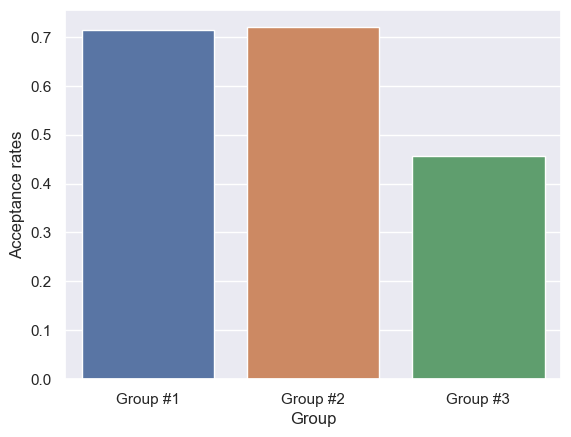

In [394]:
# Create visualization the acceptance rates between those drivers who
# Group #1: go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# Group #2: go to bars more than once a month and are under the age of 30 OR
# Group #3: go to cheap restaurants more than 4 times a month and income is less than 50K.
prop_comp = {'Group': ['Group #1', 'Group #2', 'Group #3'],
        'Acceptance rates': [prop_data_gp_7, prop_data_gp_8, prop_data_gp_9]
        }

prop_comp_df = pd.DataFrame(prop_comp)
prop_comp_df

sns.barplot(prop_comp_df, x = "Group",  y = "Acceptance rates")

# Conclusions:
# (1) The analysis shows that the more frequently a person goes to a bar per month, the more likely he/her would accept the bar coupons
# (2) It also shows that for those who go to bars more than once a month, they are the likely candidates to accept bar coupons
# (3) The influence such as age, income, occupation, going cheap restaurants only play indecisive roles as to the acceptance rates


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [395]:
# I want to explore the category of cheap restaurant 'Restaurant(<20)' coupon   
# Create a new dataframe that contains only the Restaurant(<20) coupons
df_replace = data_2.replace('Restaurant(<20)', 'Restaurant_20')
data_ch_res = df_replace[df_replace['coupon'].str.contains("Restaurant_20")]

data_ch_res

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant_20,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant_20,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant_20,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
42,Work,Alone,Sunny,55,7AM,Restaurant_20,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
44,No Urgent Place,Alone,Sunny,55,2PM,Restaurant_20,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant_20,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant_20,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant_20,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12677,Home,Partner,Sunny,30,6PM,Restaurant_20,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


In [396]:
# Calculate the proportion of cheap restaurant 'Restaurant(<20)'' coupons were accepted
#print(data_ch_res['Y'].sum())
#print(len(data_ch_res))
prop_accp_ch_20 = data_ch_res['Y'].sum() / len(data_ch_res)

print(prop_accp_ch_20)

0.7090086694308331


In [397]:
# Compare the acceptance rate between those who went to a cheap restaurant 3 or fewer times a month to those who went more.
data_res_3_or_less = data_ch_res.query("RestaurantLessThan20 == ['never', 'less1', '1~3']")
prop_res_3_or_less = data_res_3_or_less['Y'].sum() / len(data_res_3_or_less)

#data_res_3_or_less.info()
print(prop_res_3_or_less)

# Create a new dataframe that contains those who went to a bar 4 or more times 
ans_10 = prop_res_3_or_less < prop_res_4_or_more
data_res_4_or_more = data_ch_res.query("RestaurantLessThan20 == ['4~8', 'gt8']")
prop_res_4_or_more = data_res_4_or_more['Y'].sum() / len(data_res_4_or_more)

#data_res_4_or_more.info()
print(prop_res_4_or_more)

# Compare the acceptance rate, True means people went to a bar 4 or more times have higher acceptance rate 
ans_10 = prop_res_3_or_less < prop_res_4_or_more
print(ans_10)

# Conclusion: People went to a cheap restaurant 4 or more times have slightly higher acceptance rate of coupons

0.6947236180904522
0.7304429783223374
True


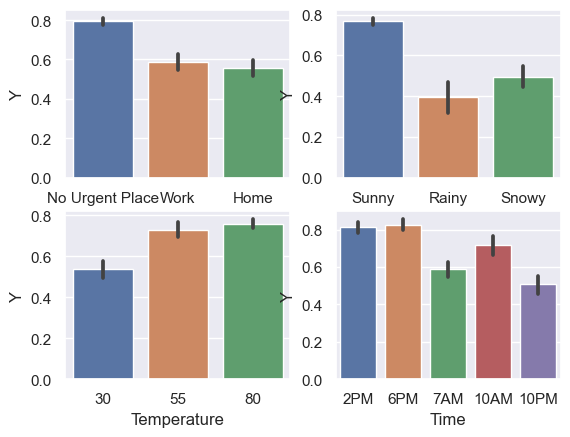

In [398]:
# Using visualization to study the influence of contextual attributes such as destination, weather, temperature 
# and time as to coupon acceptance
fig, axs = plt.subplots(2, 2)
fg_1 = sns.barplot(data = data_ch_res, x = "destination", y = "Y", ax=axs[0, 0])
fg_1.set(xlabel = 'Destination')

fg_2 = sns.barplot(data = data_ch_res, x = "weather", y = "Y", ax=axs[0, 1])
fg_2.set(xlabel = 'Weather')

fg_3 = sns.barplot(data = data_ch_res, x = "temperature", y = "Y", ax=axs[1, 0])
fg_3.set(xlabel = 'Temperature')

fg_4 = sns.barplot(data = data_ch_res, x = "time", y = "Y", ax=axs[1,1])
fg_4.set(xlabel = 'Time')

fg_plot1 = fg_4.get_figure()
fg_plot1.savefig("images/Coupon_Fig_1.png")

# Conclusions:
# People are more likely to accept cheap restaurant coupons when 
# (1) No urgent place for destination
# (2) Sunny weather
# (3) Higher temperature
# (4) In the afternoon or before lunch time
# There observations for people accepting cheap restaurant coupons make sense in real life.

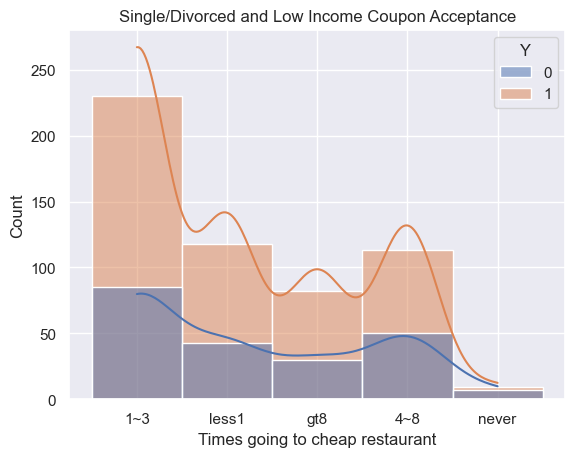

In [399]:
# Using histogram to explore the user attributes such as income and marital status in regarding to going cheap restaurant
sgl_or_divd = ['Single', 'Divorced']
income_50K_less = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

data_res_income_50K_less_sgl_or_divd = data_ch_res.query('income in @income_50K_less & maritalStatus in @sgl_or_divd')

fg_5 = sns.histplot(data=data_res_income_50K_less_sgl_or_divd, x="RestaurantLessThan20", hue = "Y", kde = True)
fg_5.set(xlabel = 'Times going to cheap restaurant', ylabel = 'Count', title = 'Single/Divorced and Low Income Coupon Acceptance')
fg_plot2 = fg_5.get_figure()
fg_plot2.savefig("images/Coupon_Fig_2.png")

# Conclusions: 
# For people with income less than 50K and in single or divorced marital status, we can observe the followings 
# in regard to the times of going to cheap restaurant
# (1) People who go to cheap restaurant 1 to 3 times are more likely to accept the coupon
# (2) People who never go to cheap restaurant are less likely to accept the coupon
# (3) People who go to cheap restaurant otherwise are slightly in favor of coupon acceptance and more depending on other factors. 

In [400]:
# Compare the acceptance rate between drivers who go to a cheap restaurant more than once a month 
# and are single or divorced to the all others.
# Create a new dataframe that contains those who go to a cheap restaurant more than once a month and 
# are single or divorced to the all others. Calculate the proportion of cheap restaurant coupons were accepted after that
res_1_or_more = ['1~3', '4~8', 'gt8']

data_res_1_or_more_sgl_or_divd = data_ch_res.query('RestaurantLessThan20 in @res_1_or_more & maritalStatus in @sgl_or_divd')
#data_res_1_or_more_sgl_or_divd.info()

prop_res_1_or_more_sgl_or_divd = data_res_1_or_more_sgl_or_divd['Y'].sum() / len(data_res_1_or_more_sgl_or_divd)
print(prop_res_1_or_more_sgl_or_divd)

# Create a new dataframe that contains those who go to a cheap restaurant less than once a month or 
# are married of all others. Then calculate the proportion of bar coupons were accepted
res_1_or_less = ['never', 'less1']
partners = ['Unmarried partner', 'Married partner']

data_res_1_or_less_partners = data_ch_res.query('RestaurantLessThan20 in @res_1_or_less | maritalStatus in @partners')
#data_res_1_or_less_partners.info()

prop_res_1_or_less_partners = data_res_1_or_less_partners['Y'].sum() / len(data_res_1_or_less_partners)
print(prop_res_1_or_less_partners)

# Compare the acceptance rate of these two groups. True means drivers who go to a cheap restaurant  more than once a month 
# and are single or divorced are more likely to accep the coupons
ans_11 = prop_res_1_or_more_sgl_or_divd > prop_res_1_or_less_partners
print(ans_11)

# Conclusion: Drivers who go to a cheap restaurant more than once a month and are single or divorced 
# are slightly less likely to accept the coupons.

0.7277970011534025
0.7013574660633484
True


In [401]:
# Further study these two groups's coupon acceptance using visualization
# Group 1: People who go to a cheap restaurant more than once a month and are single or divorced
# Group 2: People who go to a cheap restaurant less than once a month or are married
#data_res_1_or_less_partners
#data_res_1_or_more_sgl_or_divd

# Study the education influence on coupon acceptance for group 2
gp1_sub = data_res_1_or_less_partners[["education", "Y"]]
gp1_sum = gp1_sub.groupby(['education']).agg(sum)[["Y"]]
gp1_sum_r = gp1_sum.reset_index()

# Create Seaborn pie chart 
#colors = sns.color_palette('pastel')[0:5]
#plt.pie(gp1_sum_r["Y"], labels = gp1_sum_r["education"], colors = colors, autopct='%.0f%%')
#plt.title('Group1: Education vs coupon acceptance')

# Create Plotly pie chart 
fig_6 = px.pie(gp1_sum_r, values='Y', names='education', title = "Group1: Education vs coupon acceptance")
fig_6.show()

#pip install -U kaleido
#fig_6.write_image("images/Coupon_Fig_3.png")

# Study the passenger influence on coupon acceptance for group 2
gp2_rename = data_res_1_or_more_sgl_or_divd.rename(columns={"passanger": "passenger"})
gp2_sub = gp2_rename[["passenger", "Y"]]
gp2_sum = gp2_sub.groupby(['passenger']).agg(sum)[["Y"]]
gp2_sum_r = gp2_sum.reset_index()

# Create Plotly pie chart for group 2
fig_7 = px.pie(gp2_sum_r, values='Y', names='passenger', title = "Group2: Passenger vs coupon acceptance")
fig_7.show()

#fig_7.write_image("images/Coupon_Fig_4.png")

# Conclusions:
# (1) For group 1 of people who go to a cheap restaurant more than once a month and are single or divorced,
#     those with higher education (some colloge, bachelors degree, graduate degree) are more likely to accept 
#     coupons as compared to those with lower education.
#
# (2) For group 2 of people who go to a cheap restaurant less than once a month or are married,
#     those driving alone or with friends are more likely to accept coupons as compared to those driving
#     with partners or kids.
